In [1]:
install.packages("tidyverse")
library(tidyverse)

Installing package into ‚Äò/usr/local/lib/R/site-library‚Äô
(as ‚Äòlib‚Äô is unspecified)

‚îÄ‚îÄ Attaching core tidyverse packages ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ tidyverse 2.0.0 ‚îÄ‚îÄ
‚úî dplyr     1.1.4     ‚úî readr     2.1.5
‚úî forcats   1.0.1     ‚úî stringr   1.5.2
‚úî ggplot2   4.0.0     ‚úî tibble    3.3.0
‚úî lubridate 1.9.4     ‚úî tidyr     1.3.1
‚úî purrr     1.1.0     
‚îÄ‚îÄ Conflicts ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ tidyverse_conflicts() ‚îÄ‚îÄ
‚úñ dplyr::filter() masks stats::filter()
‚úñ dplyr::lag()    masks stats::lag()
‚Ñπ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
dados <- read.csv2("Dados das ligas nacionais.csv", fileEncoding = "latin1", check.names = FALSE)

In [3]:
glimpse(dados)

Rows: 4,336
Columns: 5
$ Time_da_casa                          <chr> "Austria Klagenfurt", "Austria K‚Ä¶
$ Gols_feitos_pelo_time_da_casa         <int> 0, 3, 4, 2, 1, 1, 0, 2, 0, 0, 2,‚Ä¶
$ Gols_feitos_pelo_time_de_fora_de_casa <int> 1, 1, 2, 2, 2, 1, 0, 2, 2, 3, 1,‚Ä¶
$ Time_de_fora_de_casa                  <chr> "Austria Wien", "Blau-Weiss Linz‚Ä¶
$ Liga                                  <chr> "Austrian Bundesliga", "Austrian‚Ä¶


In [4]:
summary(dados)

 Time_da_casa       Gols_feitos_pelo_time_da_casa
 Length:4336        Min.   :0.000                
 Class :character   1st Qu.:0.000                
 Mode  :character   Median :1.000                
                    Mean   :1.428                
                    3rd Qu.:2.000                
                    Max.   :9.000                
 Gols_feitos_pelo_time_de_fora_de_casa Time_de_fora_de_casa     Liga          
 Min.   :0.0                           Length:4336          Length:4336       
 1st Qu.:0.0                           Class :character     Class :character  
 Median :1.0                           Mode  :character     Mode  :character  
 Mean   :1.2                                                                  
 3rd Qu.:2.0                                                                  
 Max.   :9.0                                                                  

In [5]:
dados |>
  group_by(Liga) |>
  summarise(
    Jogos = n(),
    Times = length(unique(Time_da_casa)),
    Gols_feitos = sum(Gols_feitos_pelo_time_da_casa),
    Gols_sofridos = sum(Gols_feitos_pelo_time_de_fora_de_casa)
  )

Liga                        Jogos Times Gols_feitos Gols_sofridos
1  Argentine Primera Divisi√≥n  210   30    250         165          
2  Austrian Bundesliga         132   12    213         156          
3  Brasileir√£o                 116   20    160         100          
4  Bundesliga                  306   18    499         460          
5  Egyptian Premier League     153   18    166         149          
6  English Premier League      380   20    575         540          
7  J1 League                   209   20    261         223          
8  K League 1                  121   12    140         138          
9  La Liga                     380   20    552         443          
10 Liga MX                     307   18    480         360          
11 Ligue 1                     306   18    492         420          
12 New Zealand National League  83   12    141         144          
13 Portuguese Primeira Liga    306   18    429         357          
14 Saudi Pro League            305   18    477         422          
15 Serie A                     380   20    509         464          
16 South African Premiership   220   16    253         189          
17 Tunisian Ligue 1            240   16    283         205          
18 UAE Pro League              182   14    313         270

In [6]:
dados |>
  group_by(Liga) |>
  summarise(
    Jogos = n(),
    Times = length(unique(Time_da_casa)),
    Gols_feitos_casa = sum(Gols_feitos_pelo_time_da_casa),
    Gols_sofridos_casa = sum(Gols_feitos_pelo_time_de_fora_de_casa),
    Gols_feitos_total = sum(Gols_feitos_pelo_time_da_casa) + sum(Gols_feitos_pelo_time_de_fora_de_casa),
    Media_de_gols_por_partida = (sum(Gols_feitos_pelo_time_da_casa) + sum(Gols_feitos_pelo_time_de_fora_de_casa)) / n()
  )

Liga                        Jogos Times Gols_feitos_casa Gols_sofridos_casa
1  Argentine Primera Divisi√≥n  210   30    250              165               
2  Austrian Bundesliga         132   12    213              156               
3  Brasileir√£o                 116   20    160              100               
4  Bundesliga                  306   18    499              460               
5  Egyptian Premier League     153   18    166              149               
6  English Premier League      380   20    575              540               
7  J1 League                   209   20    261              223               
8  K League 1                  121   12    140              138               
9  La Liga                     380   20    552              443               
10 Liga MX                     307   18    480              360               
11 Ligue 1                     306   18    492              420               
12 New Zealand National League  83   12    141              144               
13 Portuguese Primeira Liga    306   18    429              357               
14 Saudi Pro League            305   18    477              422               
15 Serie A                     380   20    509              464               
16 South African Premiership   220   16    253              189               
17 Tunisian Ligue 1            240   16    283              205               
18 UAE Pro League              182   14    313              270               
   Gols_feitos_total Media_de_gols_por_partida
1   415              1.976190                 
2   369              2.795455                 
3   260              2.241379                 
4   959              3.133987                 
5   315              2.058824                 
6  1115              2.934211                 
7   484              2.315789                 
8   278              2.297521                 
9   995              2.618421                 
10  840              2.736156                 
11  912              2.980392                 
12  285              3.433735                 
13  786              2.568627                 
14  899              2.947541                 
15  973              2.560526                 
16  442              2.009091                 
17  488              2.033333                 
18  583              3.203297

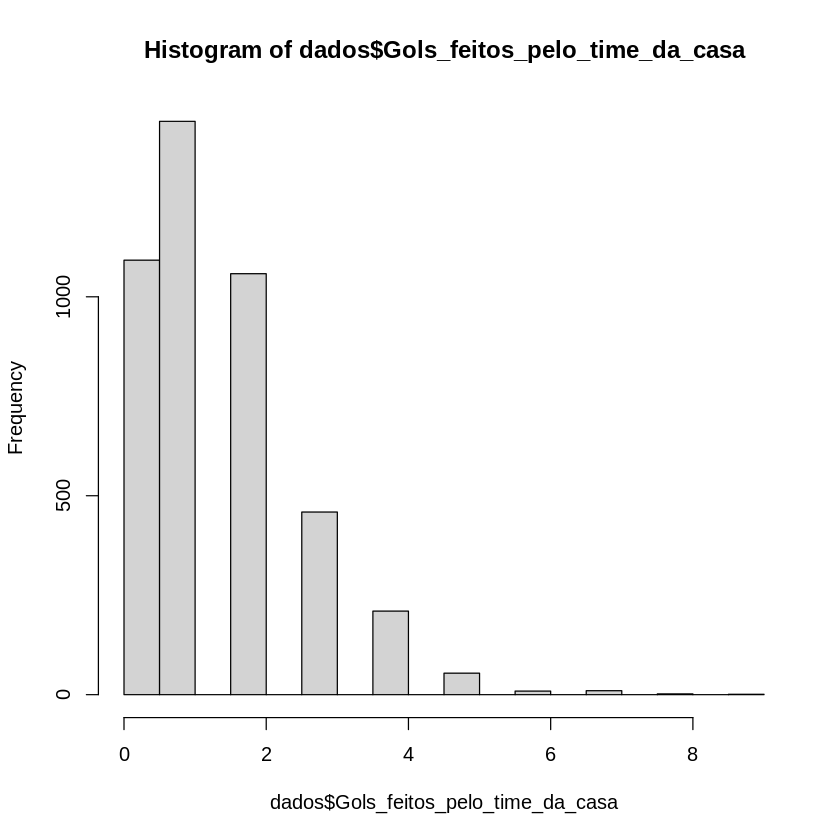

In [7]:
hist(dados$Gols_feitos_pelo_time_da_casa)

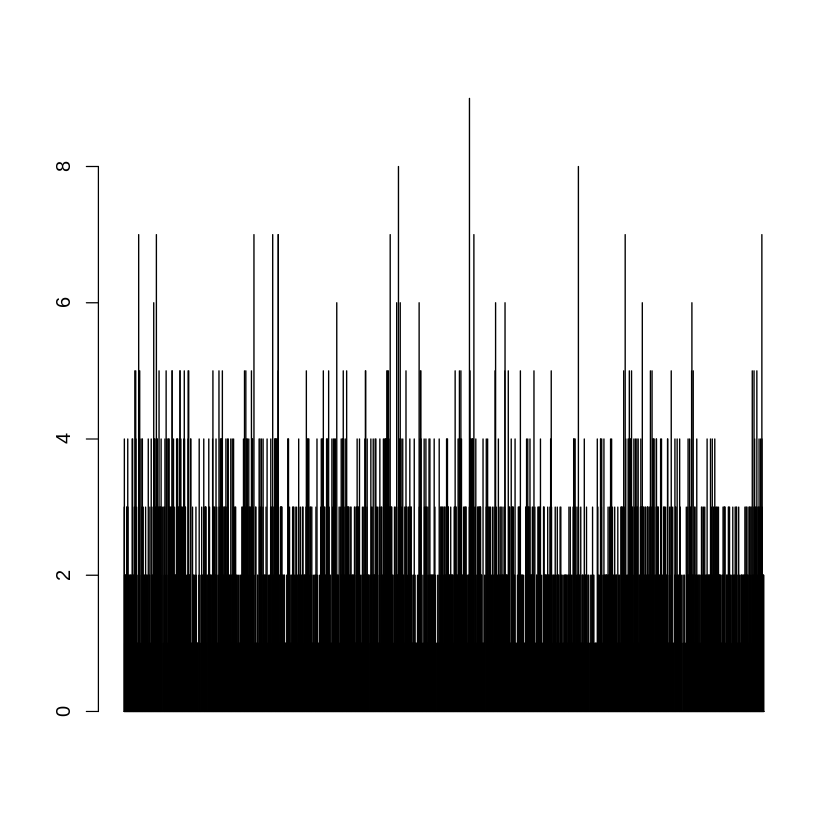

In [26]:
barplot(dados$Gols_feitos_pelo_time_da_casa)

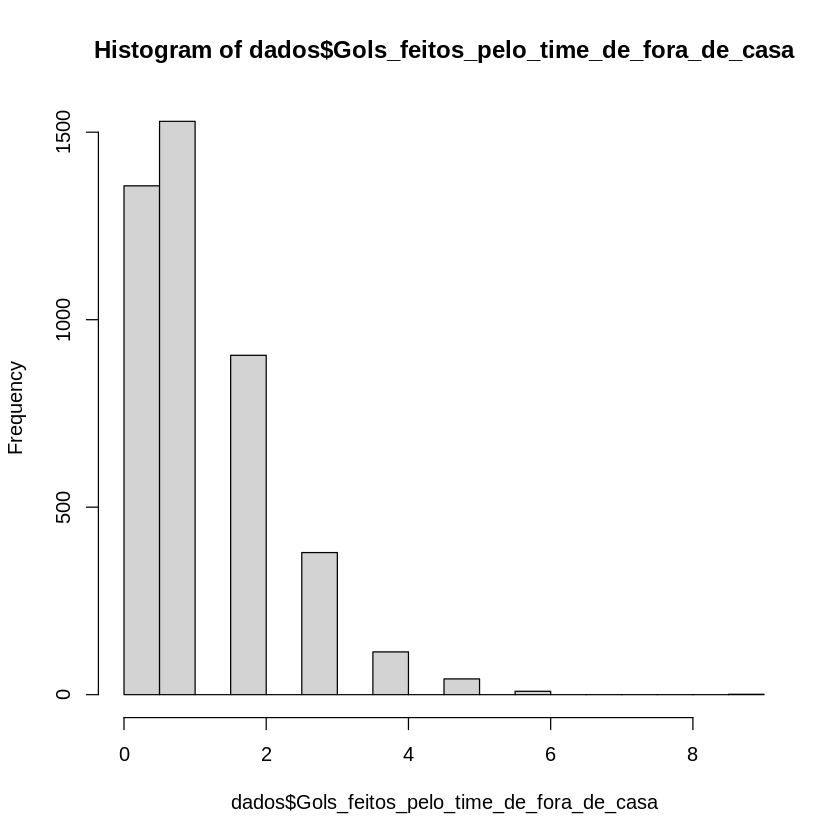

In [8]:
hist(dados$Gols_feitos_pelo_time_de_fora_de_casa)

In [9]:
dados |>
  group_by(Liga, Time_da_casa) |>
  summarise(
    Jogos = n(),
    Gols_feitos = sum(Gols_feitos_pelo_time_da_casa),
    Gols_sofridos = sum(Gols_feitos_pelo_time_de_fora_de_casa)
  )

`summarise()` has grouped output by 'Liga'. You can override using the
`.groups` argument.


Liga                       Time_da_casa            Jogos Gols_feitos
1   Argentine Primera Divisi√≥n Aldosivi                7      7         
2   Argentine Primera Divisi√≥n Argentinos Juniors      7     13         
3   Argentine Primera Divisi√≥n Atl√©tico Tucuman        7     12         
4   Argentine Primera Divisi√≥n Banfield                7      9         
5   Argentine Primera Divisi√≥n Barracas Central        7     12         
6   Argentine Primera Divisi√≥n Belgrano                7      8         
7   Argentine Primera Divisi√≥n Boca Juniors            7     13         
8   Argentine Primera Divisi√≥n Central Cordoba (SdE)   7     10         
9   Argentine Primera Divisi√≥n Defensa y Justicia      7      6         
10  Argentine Primera Divisi√≥n Deportivo Riestra       7      4         
11  Argentine Primera Divisi√≥n Estudiantes (LP)        7     10         
12  Argentine Primera Divisi√≥n Gimnasia y Esgrima (LP) 7      6         
13  Argentine Primera Divisi√≥n Godoy Cruz              7      2         
14  Argentine Primera Divisi√≥n Huracan                 7      9         
15  Argentine Primera Divisi√≥n Independiente           7     15         
16  Argentine Primera Divisi√≥n Independiente Rivadavia 7     11         
17  Argentine Primera Divisi√≥n Instituto               7     11         
18  Argentine Primera Divisi√≥n Lanus                   7      8         
19  Argentine Primera Divisi√≥n Newell's Old Boys       7      5         
20  Argentine Primera Divisi√≥n Platense                7      7         
21  Argentine Primera Divisi√≥n Racing                  7     14         
22  Argentine Primera Divisi√≥n River Plate             7     12         
23  Argentine Primera Divisi√≥n Rosario Central         7     14         
24  Argentine Primera Divisi√≥n San Lorenzo             7      6         
25  Argentine Primera Divisi√≥n San Martin (SJ)         7      1         
26  Argentine Primera Divisi√≥n Sarmiento (J)           7      5         
27  Argentine Primera Divisi√≥n Talleres (C)            7      6         
28  Argentine Primera Divisi√≥n Tigre                   7      5         
29  Argentine Primera Divisi√≥n Union                   7      7         
30  Argentine Primera Divisi√≥n Velez Sarsfield         7      2         
‚ãÆ   ‚ãÆ                          ‚ãÆ                       ‚ãÆ     ‚ãÆ          
291 Tunisian Ligue 1           AS Gab√®s                15    10         
292 Tunisian Ligue 1           AS Soliman              15     7         
293 Tunisian Ligue 1           CA Bizertin             15    24         
294 Tunisian Ligue 1           CS Sfaxien              15    14         
295 Tunisian Ligue 1           Club Africain           15    19         
296 Tunisian Ligue 1           EGS Gafsa               15    15         
297 Tunisian Ligue 1           ES M√©tlaoui             15    20         
298 Tunisian Ligue 1           Esp√©rance de Tunis      15    29         
299 Tunisian Ligue 1           Esp√©rance de Zarzis     15    22         
300 Tunisian Ligue 1           JS El Omrane            15    17         
301 Tunisian Ligue 1           Olympique B√©ja          15    11         
302 Tunisian Ligue 1           Stade Tunisien          15    17         
303 Tunisian Ligue 1           US Ben Guerdane         15    17         
304 Tunisian Ligue 1           US Monastir             15    32         
305 Tunisian Ligue 1           US Tataouine            15    11         
306 Tunisian Ligue 1           √âtoile du Sahel         15    18         
307 UAE Pro League             Ajman                   13    29         
308 UAE Pro League             Al Ain                  13    28         
309 UAE Pro League             Al Bataeh               13    15         
310 UAE Pro League             Al Jazira               13    20         
311 UAE Pro League             Al Nasr                 13    23         
312 UAE Pro League             Al Urooba               13    16         
313 UAE Pro Lea

In [10]:
dados_de_times_em_casa <- dados |>
  group_by(Liga, Time_da_casa) |>
  summarise(
    Jogos_em_casa = n(),
    Gols_feitos_em_casa = sum(Gols_feitos_pelo_time_da_casa),
    Gols_sofridos_em_casa = sum(Gols_feitos_pelo_time_de_fora_de_casa)
  )
dados_de_times_fora_de_casa <- dados |>
  group_by(Liga, Time_de_fora_de_casa) |>
  summarise(
    Jogos_fora_de_casa = n(),
    Gols_feitos_fora_de_casa = sum(Gols_feitos_pelo_time_da_casa),
    Gols_sofridos_fora_de_casa = sum(Gols_feitos_pelo_time_de_fora_de_casa)
  )
dados_de_times <- dados_de_times_em_casa |>
  merge(
    dados_de_times_fora_de_casa,
    by.x = c("Time_da_casa", "Liga"),
    by.y = c("Time_de_fora_de_casa", "Liga")
  )
colnames(dados_de_times)[1] <- "Time"
dados_de_times


`summarise()` has grouped output by 'Liga'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Liga'. You can override using the
`.groups` argument.


Time                    Liga                        Jogos_em_casa
1   1. FC Heidenheim        Bundesliga                  17           
2   AC Milan                Serie A                     19           
3   Ajman                   UAE Pro League              13           
4   Al Ahly                 Egyptian Premier League      9           
5   Al Ain                  UAE Pro League              13           
6   Al Bataeh               UAE Pro League              13           
7   Al Ittihad              Egyptian Premier League      9           
8   Al Jazira               UAE Pro League              13           
9   Al Masry                Egyptian Premier League      8           
10  Al Nasr                 UAE Pro League              13           
11  Al Urooba               UAE Pro League              13           
12  Al Wahda                UAE Pro League              13           
13  Al Wasl                 UAE Pro League              13           
14  Al-Ahli                 Saudi Pro League            17           
15  Al-Ettifaq              Saudi Pro League            17           
16  Al-Fateh                Saudi Pro League            17           
17  Al-Fayha                Saudi Pro League            17           
18  Al-Hilal                Saudi Pro League            17           
19  Al-Ittihad              Saudi Pro League            17           
20  Al-Khaleej              Saudi Pro League            17           
21  Al-Kholood              Saudi Pro League            17           
22  Al-Nassr                Saudi Pro League            17           
23  Al-Okhdood              Saudi Pro League            17           
24  Al-Orobah               Saudi Pro League            16           
25  Al-Qadsiah              Saudi Pro League            17           
26  Al-Raed                 Saudi Pro League            17           
27  Al-Riyadh               Saudi Pro League            17           
28  Al-Shabab               Saudi Pro League            17           
29  Al-Taawoun              Saudi Pro League            17           
30  Al-Wehda                Saudi Pro League            17           
‚ãÆ   ‚ãÆ                       ‚ãÆ                           ‚ãÆ            
291 UNAM                    Liga MX                     17           
292 Union                   Argentine Primera Divisi√≥n   7           
293 Union Berlin            Bundesliga                  17           
294 Urawa Red Diamonds      J1 League                   11           
295 US Ben Guerdane         Tunisian Ligue 1            15           
296 US Monastir             Tunisian Ligue 1            15           
297 US Tataouine            Tunisian Ligue 1            15           
298 Valencia                La Liga                     19           
299 Valladolid              La Liga                     19           
300 Vasco da Gama           Brasileir√£o                  6           
301 Velez Sarsfield         Argentine Primera Divisi√≥n   7           
302 Venezia                 Serie A                     19           
303 VfB Stuttgart           Bundesliga                  17           
304 VfL Bochum              Bundesliga                  17           
305 VfL Wolfsburg           Bundesliga                  17           
306 Villarreal              La Liga                     19           
307 Vissel Kobe             J1 League                   10           
308 Vitoria                 Brasileir√£o                  6           
309 Vitoria de Guimaraes    Portuguese Primeira Liga    17           
310 Werder Bremen           Bundesliga                  17           
311 West Coast Rangers      New Zealand National League  6           
312 West Ham United         English Premier League      19           
313 Western Springs         New Zealand National League  7           
314 Wolfsberg               Austrian Bundesliga         11           
315 Wolverhampton Wanderers English Premier League      19           
31

In [11]:
dados_de_times$Jogos <- dados_de_times$Jogos_em_casa + dados_de_times$Jogos_fora_de_casa
dados_de_times$Gols_feitos <- dados_de_times$Gols_feitos_em_casa + dados_de_times$Gols_feitos_fora_de_casa
dados_de_times$Gols_sofridos <- dados_de_times$Gols_sofridos_em_casa + dados_de_times$Gols_sofridos_fora_de_casa
dados_de_times$Gols_feitos_por_jogo <- dados_de_times$Gols_feitos / dados_de_times$Jogos
dados_de_times$Gols_sofridos_por_jogo <- dados_de_times$Gols_sofridos / dados_de_times$Jogos
dados_de_times

Time                    Liga                        Jogos_em_casa
1   1. FC Heidenheim        Bundesliga                  17           
2   AC Milan                Serie A                     19           
3   Ajman                   UAE Pro League              13           
4   Al Ahly                 Egyptian Premier League      9           
5   Al Ain                  UAE Pro League              13           
6   Al Bataeh               UAE Pro League              13           
7   Al Ittihad              Egyptian Premier League      9           
8   Al Jazira               UAE Pro League              13           
9   Al Masry                Egyptian Premier League      8           
10  Al Nasr                 UAE Pro League              13           
11  Al Urooba               UAE Pro League              13           
12  Al Wahda                UAE Pro League              13           
13  Al Wasl                 UAE Pro League              13           
14  Al-Ahli                 Saudi Pro League            17           
15  Al-Ettifaq              Saudi Pro League            17           
16  Al-Fateh                Saudi Pro League            17           
17  Al-Fayha                Saudi Pro League            17           
18  Al-Hilal                Saudi Pro League            17           
19  Al-Ittihad              Saudi Pro League            17           
20  Al-Khaleej              Saudi Pro League            17           
21  Al-Kholood              Saudi Pro League            17           
22  Al-Nassr                Saudi Pro League            17           
23  Al-Okhdood              Saudi Pro League            17           
24  Al-Orobah               Saudi Pro League            16           
25  Al-Qadsiah              Saudi Pro League            17           
26  Al-Raed                 Saudi Pro League            17           
27  Al-Riyadh               Saudi Pro League            17           
28  Al-Shabab               Saudi Pro League            17           
29  Al-Taawoun              Saudi Pro League            17           
30  Al-Wehda                Saudi Pro League            17           
‚ãÆ   ‚ãÆ                       ‚ãÆ                           ‚ãÆ            
291 UNAM                    Liga MX                     17           
292 Union                   Argentine Primera Divisi√≥n   7           
293 Union Berlin            Bundesliga                  17           
294 Urawa Red Diamonds      J1 League                   11           
295 US Ben Guerdane         Tunisian Ligue 1            15           
296 US Monastir             Tunisian Ligue 1            15           
297 US Tataouine            Tunisian Ligue 1            15           
298 Valencia                La Liga                     19           
299 Valladolid              La Liga                     19           
300 Vasco da Gama           Brasileir√£o                  6           
301 Velez Sarsfield         Argentine Primera Divisi√≥n   7           
302 Venezia                 Serie A                     19           
303 VfB Stuttgart           Bundesliga                  17           
304 VfL Bochum              Bundesliga                  17           
305 VfL Wolfsburg           Bundesliga                  17           
306 Villarreal              La Liga                     19           
307 Vissel Kobe             J1 League                   10           
308 Vitoria                 Brasileir√£o                  6           
309 Vitoria de Guimaraes    Portuguese Primeira Liga    17           
310 Werder Bremen           Bundesliga                  17           
311 West Coast Rangers      New Zealand National League  6           
312 West Ham United         English Premier League      19           
313 Western Springs         New Zealand National League  7           
314 Wolfsberg               Austrian Bundesliga         11           
315 Wolverhampton Wanderers English Premier League      19           
31

In [12]:
dados_de_times$Time[order(dados_de_times$Gols_feitos_por_jogo)]

[1] "San Lorenzo"              "San Martin (SJ)"         
  [3] "Deportivo Riestra"        "Talleres (C)"            
  [5] "Palmeiras"                "Al Ittihad"              
  [7] "Smouha"                   "Tigre"                   
  [9] "Al Masry"                 "SuperSport United"       
 [11] "FC Seoul"                 "Platense"                
 [13] "CS Sfaxien"               "Tala'ea El Gaish"        
 [15] "ZED"                      "Stellenbosch"            
 [17] "Gangwon FC"               "Sanfrecce Hiroshima"     
 [19] "Yokohama FC"              "Red Bull Bragantino"     
 [21] "Getafe"                   "East Coast Bays"         
 [23] "Lanus"                    "Olympique B√©ja"          
 [25] "Stade Tunisien"           "El Gouna"                
 [27] "Farense"                  "FC St. Pauli"            
 [29] "Ismaily"                  "Tokyo Verdy"             
 [31] "Polokwane City"           "Richards Bay"            
 [33] "Club Africain"            "ENPPI"                   
 [35] "Godoy Cruz"               "Kashiwa Reysol"          
 [37] "Machida Zelvia"           "Modern Sport"            
 [39] "River Plate"              "Royal AM"                
 [41] "Sao Paulo"                "Velez Sarsfield"         
 [43] "Western Springs"          "√âtoile du Sahel"         
 [45] "Cape Town City"           "Magesi"                  
 [47] "Chippa United"            "Daejeon Hana Citizen"    
 [49] "Fagiano Okayama"          "Avispa Fukuoka"          
 [51] "Gwangju FC"               "Lecce"                   
 [53] "Al-Ettifaq"               "Boavista"                
 [55] "Lens"                     "National Bank of Egypt"  
 [57] "Santa Clara"              "AS Soliman"              
 [59] "Golden Arrows"            "Newell's Old Boys"       
 [61] "Sport"                    "Gimcheon Sangmu"         
 [63] "Jeonbuk Hyundai Motors"   "Kaizer Chiefs"           
 [65] "Angers"                   "Petrojet"                
 [67] "Pharco"                   "Empoli"                  
 [69] "Mallorca"                 "Rayo Vallecano"          
 [71] "US Ben Guerdane"          "WSG Tirol"               
 [73] "Gimnasia y Esgrima (LP)"  "Huracan"                 
 [75] "Rosario Central"          "Sarmiento (J)"           
 [77] "Yokohama F. Marinos"      "Reims"                   
 [79] "Shonan Bellmare"          "Vissel Kobe"             
 [81] "Torino"                   "Atletico Mineiro"        
 [83] "Santos"                   "Vitoria"                 
 [85] "Al Ahly"                  "Al-Okhdood"              
 [87] "Alaves"                   "Genoa"                   
 [89] "Hellas Verona"            "Jeju SK"                 
 [91] "AS Gab√®s"                 "Pohang Steelers"         
 [93] "US Monastir"              "Toulouse"                
 [95] "TS Galaxy"                "Napoli"                  
 [97] "Real Sociedad"            "Ulsan HD"                
 [99] "Aldosivi"                 "Independiente Rivadavia" 
[101] "Al-Fayha"                 "Al-Taawoun"              
[103] "Ghazl El Mahalla"         "Everton"                 
[105] "AmaZulu"                  "Bahia"                   
[107] "Cruzeiro"                 "FC Anyang"               
[109] "Athletic Bilbao"          "EGS Gafsa"               
[111] "Esp√©rance de Tunis"       "Al Bataeh"               
[113] "Argentinos Juniors"       "Belgrano"                
[115] "FC Tokyo"                 "Union"                   
[117] "Urawa Red Diamonds"       "Atalanta"                
[119] "Crystal Palace"           "Manchester United"       
[121] "Sevilla"                  "1. FC Heidenheim"        
[123] "Braga"                    "Estrela da Amadora"      
[125] "Mazatlan"                 "ES M√©tlaoui"             
[127] "Sekhukhune United"        "Kashima Antlers"         
[129] "Le Havre"                 "Gremio"                  
[131] "Fulham"                   "Juventus"                
[133] "Monza"                    "Udi

In [13]:
dados_de_times$Time[order(dados_de_times$Gols_sofridos_por_jogo)]

[1] "Newell's Old Boys"        "Botafogo"                
  [3] "CA Bizertin"              "Godoy Cruz"              
  [5] "Lanus"                    "El Gouna"                
  [7] "US Monastir"              "Deportivo Riestra"       
  [9] "Gimnasia y Esgrima (LP)"  "Independiente"           
 [11] "Instituto"                "San Martin (SJ)"         
 [13] "Sarmiento (J)"            "Polokwane City"          
 [15] "Richards Bay"             "Fagiano Okayama"         
 [17] "Cape Town City"           "Union"                   
 [19] "AS Gab√®s"                 "Corinthians"             
 [21] "ES M√©tlaoui"              "Magesi"                  
 [23] "Banfield"                 "Estudiantes (LP)"        
 [25] "Platense"                 "Rosario Central"         
 [27] "San Lorenzo"              "Velez Sarsfield"         
 [29] "Ceara"                    "Flamengo"                
 [31] "Juventude"                "Stade Tunisien"          
 [33] "Atletico Mineiro"         "Chippa United"           
 [35] "Fortaleza"                "Haras El Hodoud"         
 [37] "ZED"                      "Club Africain"           
 [39] "Red Bull Salzburg"        "Boca Juniors"            
 [41] "Golden Arrows"            "Huracan"                 
 [43] "River Plate"              "Talleres (C)"            
 [45] "Mazatlan"                 "AS Soliman"              
 [47] "CS Sfaxien"               "Esp√©rance de Zarzis"     
 [49] "Tokyo Verdy"              "Al Ittihad"              
 [51] "ENPPI"                    "SuperSport United"       
 [53] "Bahia"                    "Cruzeiro"                
 [55] "Internacional"            "Vitoria"                 
 [57] "Suwon FC"                 "Avispa Fukuoka"          
 [59] "Shonan Bellmare"          "Argentinos Juniors"      
 [61] "Atl√©tico Tucuman"         "Belgrano"                
 [63] "Orlando Pirates"          "Rapid Wien"              
 [65] "Estrela da Amadora"       "Marumo Gallants"         
 [67] "Roma"                     "JS El Omrane"            
 [69] "Royal AM"                 "US Ben Guerdane"         
 [71] "Urawa Red Diamonds"       "Yokohama FC"             
 [73] "Guadalajara"              "UANL"                    
 [75] "Gremio"                   "Santos"                  
 [77] "Vasco da Gama"            "Athletic Bilbao"         
 [79] "Real Sociedad"            "Tigre"                   
 [81] "Olympique B√©ja"           "Al Masry"                
 [83] "Ismaily"                  "Modern Sport"            
 [85] "Petrojet"                 "Pyramids"                
 [87] "Santa Clara"              "Tala'ea El Gaish"        
 [89] "Mallorca"                 "Gamba Osaka"             
 [91] "Nagoya Grampus"           "Kashima Antlers"         
 [93] "EGS Gafsa"                "Espanyol"                
 [95] "Venezia"                  "Al-Fayha"                
 [97] "Austria Wien"             "Barracas Central"        
 [99] "Fluminense"               "Getafe"                  
[101] "Kaizer Chiefs"            "Mamelodi Sundowns"       
[103] "Osasuna"                  "Pharco"                  
[105] "Racing"                   "Sao Paulo"               
[107] "Sport"                    "TS Galaxy"               
[109] "Ulsan HD"                 "Valencia"                
[111] "Everton"                  "Al-Qadsiah"              
[113] "America"                  "Gil Vicente"             
[115] "Queretaro"                "US Tataouine"            
[117] "AmaZulu"                  "Blau-Weiss Linz"         
[119] "Rheindorf Altach"         "FC Seoul"                
[121] "Gwangju FC"               "Napoli"                  
[123] "Torino"                   "Casa Pia"                
[125] "Ceramica Cleopatra"       "Famalicao"               
[127] "Nacional"                 "Stellenbosch"            
[129] "Alaves"                   "Atletico Madrid"         
[131] "Genoa"                    "Al-Taawoun"              
[133] "Atletico San Luis"        "FC 

In [14]:
dados_copa <- read.csv2("Resultados da Copa do Mundo.csv", fileEncoding = "latin1", check.names = FALSE)

In [15]:
glimpse(dados_copa)

Rows: 62
Columns: 4
$ Time_da_casa                          <chr> "Al Ahly", "Bayern Munich", "Par‚Ä¶
$ Gols_feitos_pelo_time_da_casa         <int> 0, 10, 4, 0, 2, 2, 2, 2, 0, 3, 0‚Ä¶
$ Gols_feitos_pelo_time_de_fora_de_casa <int> 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1,‚Ä¶
$ Time_de_fora_de_casa                  <chr> "Inter Miami CF", "Auckland City‚Ä¶


In [16]:
summary(dados_copa)

 Time_da_casa       Gols_feitos_pelo_time_da_casa
 Length:62          Min.   : 0.000               
 Class :character   1st Qu.: 0.250               
 Mode  :character   Median : 2.000               
                    Mean   : 1.806               
                    3rd Qu.: 2.000               
                    Max.   :10.000               
 Gols_feitos_pelo_time_de_fora_de_casa Time_de_fora_de_casa
 Min.   :0.00                          Length:62           
 1st Qu.:0.00                          Class :character    
 Median :1.00                          Mode  :character    
 Mean   :1.29                                              
 3rd Qu.:2.00                                              
 Max.   :5.00                                              

In [17]:
dados_opta <- read.csv2("Times e ligas.csv", fileEncoding = "latin1", check.names = FALSE)

In [18]:
glimpse(dados_opta)

Rows: 32
Columns: 3
$ Time           <chr> "Al Ahly", "Al Ain", "Al-Hilal", "Atletico Madrid", "Au‚Ä¶
$ Liga           <chr> "Egyptian Premier League", "UAE Pro League", "Saudi Pro‚Ä¶
$ Rating_da_liga <dbl> 72.9, 70.6, 78.8, 90.2, 48.4, 89.5, 81.7, 82.0, 82.0, 8‚Ä¶


In [19]:
summary(dados_opta)

     Time               Liga           Rating_da_liga 
 Length:32          Length:32          Min.   :48.40  
 Class :character   Class :character   1st Qu.:78.42  
 Mode  :character   Mode  :character   Median :81.70  
                                       Mean   :81.37  
                                       3rd Qu.:89.12  
                                       Max.   :95.70  

In [20]:
dados_combinados <- dados_de_times |>
  merge(
    dados_opta[-1],
    by = c("Liga"),
    all.x = T
  )

In [21]:
glimpse(dados_combinados)

Rows: 524
Columns: 14
$ Liga                       <chr> "Argentine Primera Divisi√≥n", "Argentine Pr‚Ä¶
$ Time                       <chr> "Newell's Old Boys", "Newell's Old Boys", "‚Ä¶
$ Jogos_em_casa              <int> 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7‚Ä¶
$ Gols_feitos_em_casa        <int> 5, 5, 8, 8, 15, 15, 9, 9, 8, 8, 2, 2, 5, 5,‚Ä¶
$ Gols_sofridos_em_casa      <int> 2, 2, 4, 4, 1, 1, 5, 5, 9, 9, 4, 4, 5, 5, 1‚Ä¶
$ Jogos_fora_de_casa         <int> 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7‚Ä¶
$ Gols_feitos_fora_de_casa   <int> 10, 10, 5, 5, 10, 10, 7, 7, 10, 10, 12, 12,‚Ä¶
$ Gols_sofridos_fora_de_casa <int> 4, 4, 3, 3, 7, 7, 6, 6, 3, 3, 3, 3, 8, 8, 6‚Ä¶
$ Jogos                      <int> 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,‚Ä¶
$ Gols_feitos                <int> 15, 15, 13, 13, 25, 25, 16, 16, 18, 18, 14,‚Ä¶
$ Gols_sofridos              <int> 6, 6, 7, 7, 8, 8, 11, 11, 12, 12, 7, 7, 13,‚Ä¶
$ Gols_feitos_por_jogo       <dbl> 1.0714286, 1.0714286, 0.9285714, 0.92857

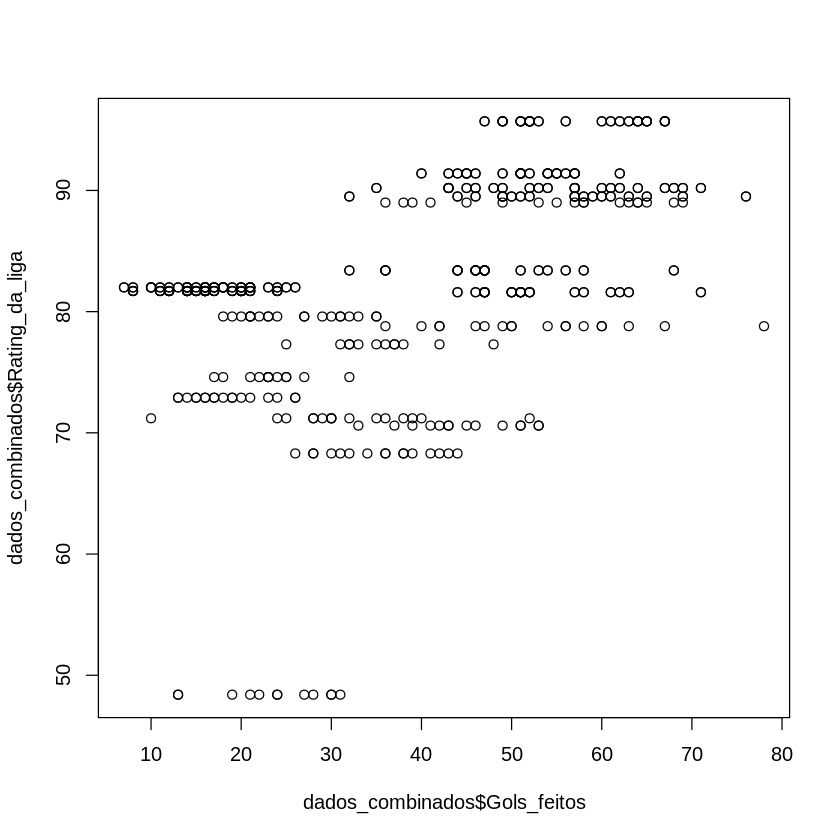

In [22]:
plot(
  x = dados_combinados$Gols_feitos,
  y = dados_combinados$Rating_da_liga
)

Warning message:
‚ÄúThe dot-dot notation (`..y..`) was deprecated in ggplot2 3.4.0.
‚Ñπ Please use `after_stat(y)` instead.‚Äù


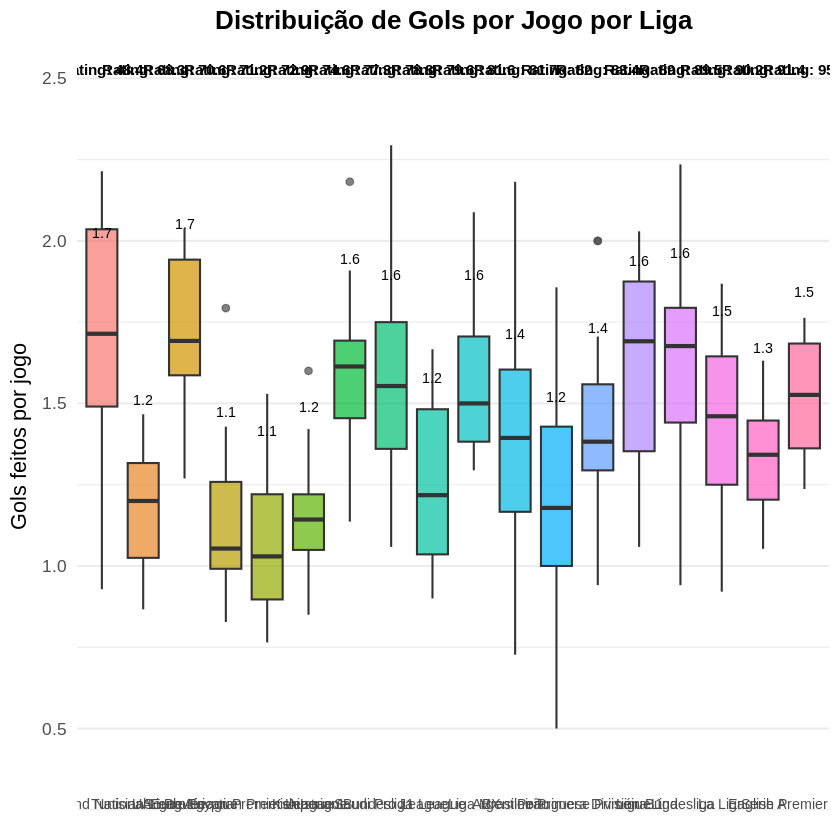

In [23]:
# Ordenar as ligas pelo rating
dados_plot <- dados_combinados |>
  mutate(Liga = reorder(Liga, Rating_da_liga))

# Criar o boxplot
ggplot(dados_plot, aes(x = Liga, y = Gols_feitos_por_jogo, fill = Liga)) +
  geom_boxplot(show.legend = FALSE, outlier.color = "gray30", alpha = 0.7) +

  # R√≥tulo superior: Rating_da_liga (m√©dia por liga)
  stat_summary(
    fun = mean,
    geom = "text",
    aes(label = round(..y.., 1)),
    position = position_nudge(y = 0.3),
    color = "black",
    size = 3,
    vjust = -0.5
  ) +

  # Adiciona r√≥tulos personalizados com geom_text (em cima e embaixo)
  geom_text(
    data = dados_plot |> distinct(Liga, Rating_da_liga),
    aes(x = Liga, y = max(dados_plot$Gols_feitos_por_jogo, na.rm = TRUE) + 0.2,
        label = paste0("Rating: ", round(Rating_da_liga, 2))),
    size = 3.2,
    fontface = "bold",
    color = "black",
    vjust = -0.5
  ) +
  geom_text(
    data = dados_plot |> distinct(Liga),
    aes(x = Liga, y = min(dados_plot$Gols_feitos_por_jogo, na.rm = TRUE) - 0.2,
        label = Liga),
    size = 3,
    color = "gray30",
    vjust = 1.5
  ) +

  labs(
    title = "Distribui√ß√£o de Gols por Jogo por Liga",
    y = "Gols feitos por jogo",
    x = NULL
  ) +
  theme_minimal(base_size = 13) +
  theme(
    axis.text.x = element_blank(),    # remove texto padr√£o
    plot.title = element_text(face = "bold", hjust = 0.5),
    panel.grid.major.x = element_blank()
  )


In [24]:
figura_boxplot <- ggplot(dados_plot, aes(x = Liga, y = Gols_feitos_por_jogo, fill = Liga)) +
  geom_boxplot(show.legend = FALSE, outlier.color = "gray30", alpha = 0.7) +

  # üîπ R√≥tulo superior (Rating_da_liga) ‚Äî √† direita
  geom_text(
    data = distinct(dados_plot, Liga, Rating_da_liga),
    aes(
      x = Liga,
      y = max(dados_plot$Gols_feitos_por_jogo, na.rm = TRUE) + 0.05,
      label = paste0("Rating: ", round(Rating_da_liga, 2))
    ),
    size = 1.6,        # rating: metade do original
    fontface = "bold",
    color = "black",
    hjust = 0,
    vjust = 0.5
  ) +

  # üîπ R√≥tulo inferior (Liga) ‚Äî √† esquerda
  geom_text(
    data = distinct(dados_plot, Liga),
    aes(
      x = Liga,
      y = min(dados_plot$Gols_feitos_por_jogo, na.rm = TRUE) - 0.05,
      label = Liga
    ),
    size = 0.75,       # üî∏ reduzido pela metade novamente
    color = "gray30",
    hjust = 1,
    vjust = 0.5
  ) +

  labs(
    title = "Distribui√ß√£o de Gols por Jogo por Liga",
    x = NULL,
    y = "Gols feitos por jogo"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    axis.text.y = element_blank(),
    plot.title = element_text(face = "bold", hjust = 0.5),
    panel.grid.major.y = element_blank()
  ) +
  coord_flip()

# üíæ Salvar figura
ggsave(
  filename = "boxplot_gols_por_liga_horizontal.png",
  plot = figura_boxplot,
  width = 10, height = 6, dpi = 300
)
